In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

import seaborn as sns

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Data Set information

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

## Attributes
1. Age - Age of the patient
2. Gender - Gender of the patient
3. TB - Total Bilirubin
4. DB - Direct Bilirubin
5. Alkphos - Alkaline Phosphotase
6. Sgpt - Alamine Aminotransferase
7. Sgot - Aspartate Aminotransferase
8. TP - Total Protiens
9. ALB - Albumin
10. A/G Ratio - Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

# Read the data

In [2]:
# dataset location
dataset_location = "./dataset/ilpd_dataset.csv"

# column names
names = ['Age', 'Gender', 'TB', 'DB', 'ALKPHOS', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG Ratio', 'selector']

# read dataset to pandas dataframe
df = pd.read_csv(dataset_location, names=names);

# show first five cols of the dataset
print("Data shape: ", df.shape)
df.head()

Data shape:  (583, 11)


,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   ALKPHOS   583 non-null    int64  
 5   SGPT      583 non-null    int64  
 6   SGOT      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG Ratio  579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a2e2710>,
      dtype=object)

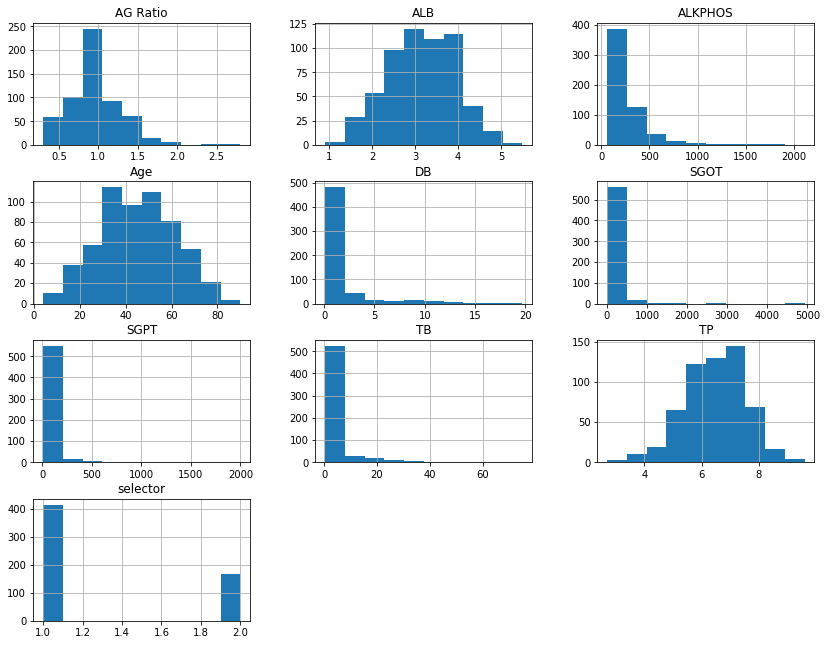

In [5]:
df.hist(figsize=(14,11))

Text(0, 0.5, 'Frequency')

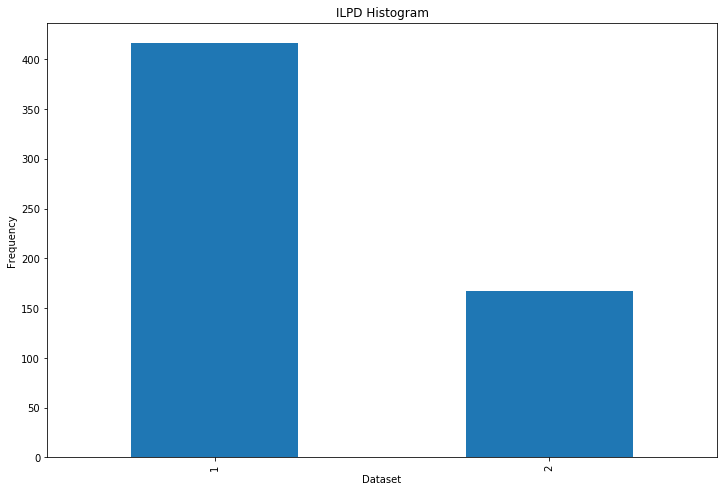

In [6]:
numb_of_classes = pd.value_counts(df['selector'], sort = True).sort_index()
numb_of_classes.plot(kind = 'bar')
plt.title("ILPD Histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

# Preprocessing

## change non-numerical values to integers

In [7]:
# check unique values
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
# one hot value encoding
df = pd.get_dummies(df)
names = df.columns

df.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


## remove empty values

In [9]:
# we can see that there are some null values in AG Ratio
df['AG Ratio'].fillna(value=0, inplace=True)

# check now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            583 non-null    int64  
 1   TB             583 non-null    float64
 2   DB             583 non-null    float64
 3   ALKPHOS        583 non-null    int64  
 4   SGPT           583 non-null    int64  
 5   SGOT           583 non-null    int64  
 6   TP             583 non-null    float64
 7   ALB            583 non-null    float64
 8   AG Ratio       583 non-null    float64
 9   selector       583 non-null    int64  
 10  Gender_Female  583 non-null    uint8  
 11  Gender_Male    583 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 46.8 KB


## split data into training & testing set

In [10]:
# shuffle data
df = shuffle(df)

# split data into feture set X and labels y
X = df.drop('selector', axis=1)
y = df['selector']

# show first five cols of feature set
X.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
506,56,17.7,8.8,239,43,185,5.6,2.4,0.70,0,1
269,26,0.6,0.1,110,15,20,2.8,1.6,1.30,0,1
241,51,0.8,0.2,230,24,46,6.5,3.1,0.00,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1
46,21,3.9,1.8,150,36,27,6.8,3.9,1.34,0,1


In [11]:
# show unique labels
y.unique()

array([1, 2])

In [12]:
# set number of test samples
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [13]:
print("Number of test samples: ", X_test.shape[0])

Number of test samples:  175


## feature scaling

In [14]:
# we can see that the ranges of particular features are very different
# we need to scale those features to fix that
scaler = StandardScaler()

X_train_before = X_train.copy(deep=True)

# fit only for training data
scaler.fit(X_train)

# transform training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_before.columns)
X_train.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,0.263228,-0.250943,-0.314214,0.594728,-0.288634,-0.259997,0.289802,0.457033,0.197334,1.687915,-1.687915
1,0.200969,-0.418338,-0.495800,-0.301124,-0.169889,-0.188646,-1.370343,-0.919587,-0.108913,-0.592447,0.592447
2,-1.044214,-0.327032,-0.386849,-0.546215,-0.331814,-0.293974,-0.263580,-0.168703,-0.108913,-0.592447,0.592447
3,0.885819,-0.281379,-0.314214,0.298928,0.801662,0.643784,-1.831494,-1.420176,-0.415160,-0.592447,0.592447
4,0.138710,-0.144419,-0.132629,1.118717,0.321284,-0.120692,0.935414,0.582180,-0.108913,-0.592447,0.592447


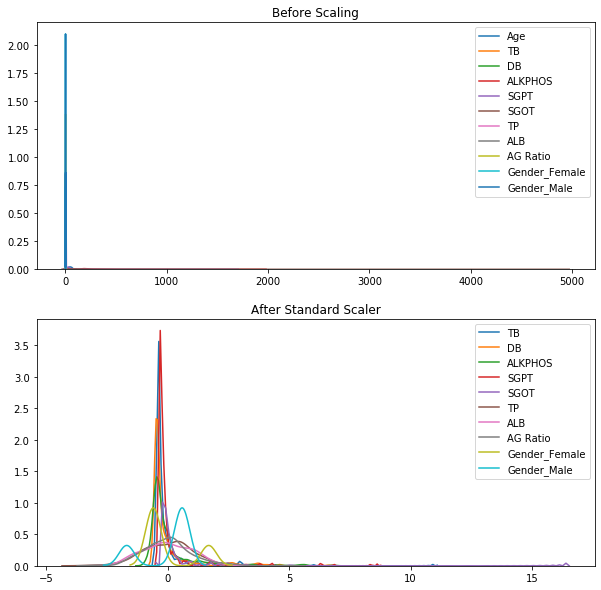

In [21]:
# show difference
labels = X_train_before.columns
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train_before['Age'], ax=ax1)
sns.kdeplot(X_train_before['TB'], ax=ax1)
sns.kdeplot(X_train_before['DB'], ax=ax1)
sns.kdeplot(X_train_before['ALKPHOS'], ax=ax1)
sns.kdeplot(X_train_before['SGPT'], ax=ax1)
sns.kdeplot(X_train_before['SGOT'], ax=ax1)
sns.kdeplot(X_train_before['TP'], ax=ax1)
sns.kdeplot(X_train_before['ALB'], ax=ax1)
sns.kdeplot(X_train_before['AG Ratio'], ax=ax1)
sns.kdeplot(X_train_before['Gender_Female'], ax=ax1)
sns.kdeplot(X_train_before['Gender_Male'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(X_train['TB'], ax=ax2)
sns.kdeplot(X_train['DB'], ax=ax2)
sns.kdeplot(X_train['ALKPHOS'], ax=ax2)
sns.kdeplot(X_train['SGPT'], ax=ax2)
sns.kdeplot(X_train['SGOT'], ax=ax2)
sns.kdeplot(X_train['TP'], ax=ax2)
sns.kdeplot(X_train['ALB'], ax=ax2)
sns.kdeplot(X_train['AG Ratio'], ax=ax2)
sns.kdeplot(X_train['Gender_Female'], ax=ax2)
sns.kdeplot(X_train['Gender_Male'], ax=ax2)

plt.show()

# Feature selection

## check correlations between the features heatmap

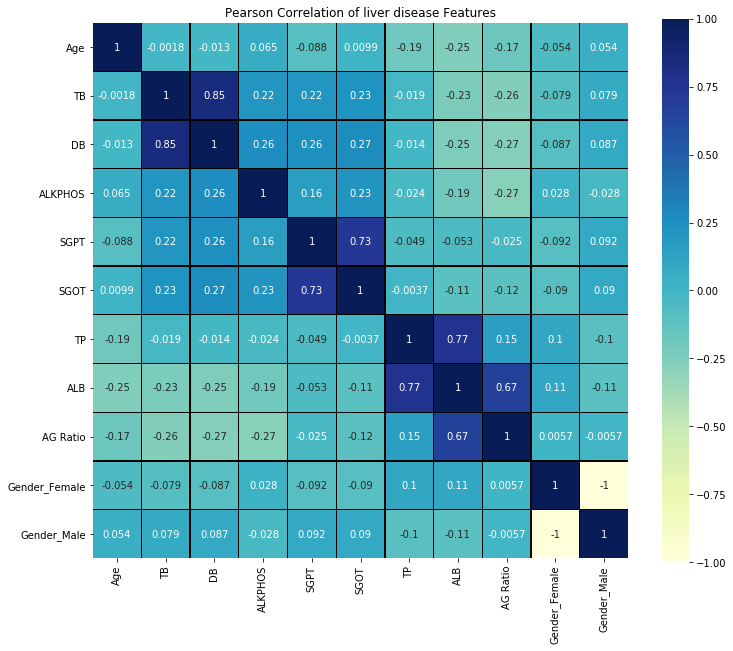

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')

# Draw the heatmap using seaborn
sns.heatmap(X_train.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

As we can see above:
- DB & TB
- SGOT & SGPT
- ALB & TP

are highly correlated. Now we need to make a feature ranking to decide what features we want to use in classification.

# Training and predictions

In [83]:
# create 2 layers of 20 nodes each + 2000 iterations
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(20), max_iter=2000, activation='tanh', learning_rate_init=0.02)

# train algorithm on training data
mlp.fit(X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

# Check the results

In [84]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

[[116   4]
 [ 42  13]]
              precision    recall  f1-score   support

           1       0.73      0.97      0.83       120
           2       0.76      0.24      0.36        55

    accuracy                           0.74       175
   macro avg       0.75      0.60      0.60       175
weighted avg       0.74      0.74      0.69       175

Accuracy Using MLP: 0.7371428571428571

